# TP3 - Champ magnétique

## ARGUELLO Camilo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from IPython.display import display, Math

#### Champ créé par une ou deux bobines

In [35]:
# Mesures
x = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5]) # cm
B = np.array([0.46, 0.48, 0.50,0.50, 0.50,0.51,0.50,0.51,0.51,0.51,0.50,0.50,0.49,0.47]) # mT

<IPython.core.display.Math object>

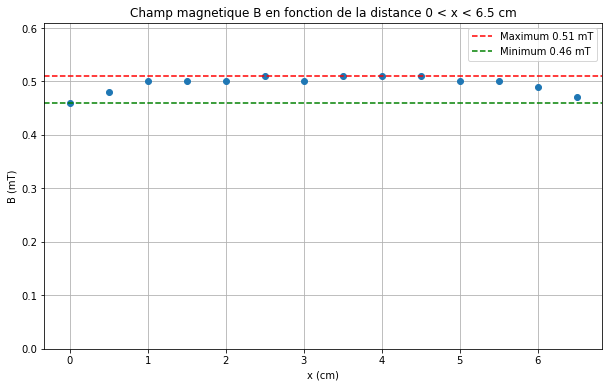

In [36]:
# Champ magnetique B en fonction de la distance

# Variation relative du champ magnetique
delta_B = (np.max(B) - np.min(B)) / np.max(B)

display(Math(r'\text{Variation relative } \, \delta B = ' + str(round(delta_B, 2)) + ' \, \\text{mT}'))

plt.figure(figsize=(10, 6))
plt.plot(x, B, 'o')
plt.axhline(np.max(B), color='red', linestyle='--', label='Maximum ' + str(np.max(B)) + ' mT')
plt.axhline(np.min(B), color='green', linestyle='--', label='Minimum ' + str(np.min(B)) + ' mT')
plt.ylim(0, np.max(B)+0.1)
plt.xlabel('x (cm)')
plt.ylabel('B (mT)')
plt.title('Champ magnetique B en fonction de la distance 0 < x < 6.5 cm')
plt.grid()
plt.legend()
plt.show()

#### Dépendance en I du champ magnétique

In [37]:
# Constantes
N = 95
a = 6.5 # cm

In [53]:
# Valeurs de I entre 0 à 1.5 A
I = np.array([0.09, 0.20, 0.39, 0.5, 0.75, 0.85, 1, 1.15, 1.25, 1.5 ])
B = np.array([0.09, 0.23, 0.47, 0.6, 0.91, 1.04, 1.21, 1.39, 1.52, 1.82])

# Incertitudes sur B et I (dans la notice)
# delta I = 5mA +1% de la valeur
delta_I = 0.005 + 0.01 * I
display(Math(r'\text{Incertitude sur } I = ' + str(np.mean(delta_I)) + ' \, \\text{A}'))

# Alpha
alpha = np.mean(B) / np.mean(I)
display(Math(r'\text{{Valeur expérimentale}} \, \alpha = ' + str(round(alpha, 2))))

# mu_0
mu_0 = (5 * np.sqrt(5) * 6.5 *10**-2 * alpha) / (8 * N)

display(Math(r'\mu_0 = %.2e \, \text{T} \, \text{m} \, \text{A}^{-1}' % mu_0))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

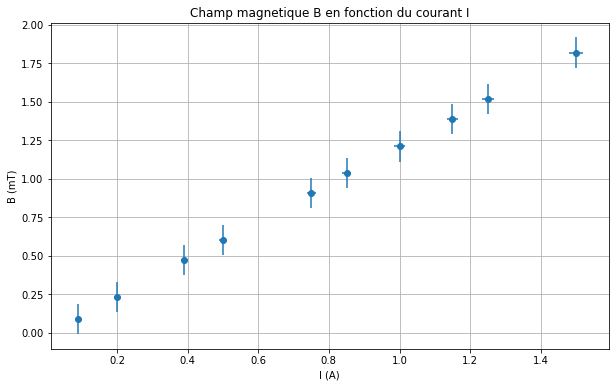

In [54]:
plt.figure(figsize=(10, 6))
plt.errorbar(I, B, xerr=delta_I, yerr=delta_B, fmt='o')
plt.xlabel('I (A)')
plt.ylabel('B (mT)')
plt.title('Champ magnetique B en fonction du courant I')
plt.grid()
plt.show()

#### Détermination de la relation entre $e(t)$ et $B(t)$

In [88]:
v_0 = np.array([0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5]) # KHz
U_eff = np.array([7.94,9.84,14.3,17.8,22.4,24.9,29.7,32.4,36.8,41.8,45.5,48.9]) # mV
e_0 = U_eff * np.sqrt(2) # mV
e_v = e_0 * 10**-3 # V
n = 200
b = 2.5 # cm
R = 500 # Ohm


I_0 = U_eff / R # mA
n_1 = (8 * mu_0 * N ) / (5 * np.sqrt(5) * a * 10**-2)
n_2 = n_1 * n * np.pi * (b * 10**-2)**2

<IPython.core.display.Math object>

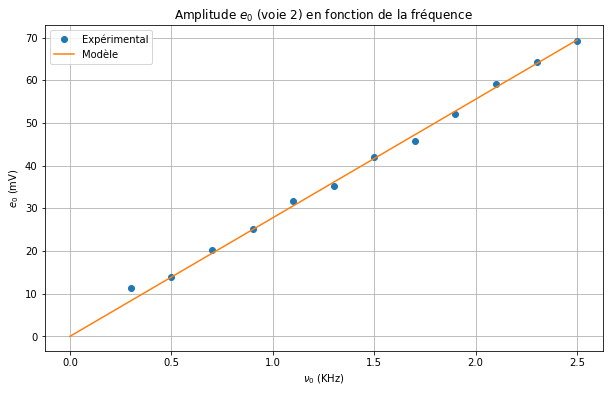

In [92]:
# Modèle d'après e(t) = k d(\phi) / dt
def model(params, v_0):
    amplitude = params[0]
    return amplitude * v_0
  
def cost_function(params, v_0, e_0):
    return np.sum((model(params, v_0) - e_0)**2)
  
params = minimize(cost_function, [1], args=(v_0, e_0)).x
display(Math('\\text{Valeur alpha mésurée} = %.2f' % params[0]))
# Modèle

x = np.linspace(0, 2.5, 100)
y = model(params, x)

# e_0 en fonction v_0
plt.figure(figsize=(10, 6))
plt.plot(v_0, e_0, 'o', label="Expérimental")
plt.plot(x, y, label="Modèle")
plt.xlabel('$\\nu_0$ (KHz)')
plt.ylabel('$e_0$ (mV)')
plt.title('Amplitude $e_0$ (voie 2) en fonction de la fréquence')
plt.grid()
plt.legend()
plt.show()